In [1]:
import pandas as pd
file_path = 'data/energy_analysis_2.xlsx'
df = pd.read_excel(file_path)
print(df.columns)

Index([' Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'],
      dtype='object')


In [4]:
# Load the Excel file with the correct header row
file_path = 'data/energy_analysis_2.xlsx'
df = pd.read_excel(file_path, header=2)  # Specify that headers are in the third row

# Print column names to verify
print(df.columns)

# Optionally, check the first few rows of the DataFrame
print(df.head())

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')
   Hour     Date/hour start  Solar electricity generation (kWh)  \
0     0 2020-01-01 00:00:00                                 0.0   
1     1 2020-01-01 01:00:00                                 0.0   
2     2 2020-01-01 02:00:00                                 0.0   
3     3 2020-01-01 03:00:00                                 0.0   
4     4 2020-01-01 04:00:00                                 0.0   

   Electricity usage (kWh)  
0                 1.509849  
1                 1.411859  
2                 1.023898  
3                 0.642000  
4                 0.960000  


In [4]:
# Convert 'Hour' to integer if not already
df['Hour'] = df['Hour'].astype(int)

# Ensure 'Date/hour start' is in datetime format
df['Date/hour start'] = pd.to_datetime(df['Date/hour start'])

# Check data types
print(df.dtypes)


Hour                                           int32
Date/hour start                       datetime64[ns]
Solar electricity generation (kWh)           float64
Electricity usage (kWh)                      float64
dtype: object


In [5]:
# Save to Excel
output_file_path = 'energy_analysis_output_file.xlsx'
df.to_excel(output_file_path, index=False)

# Save to CSV (optional)
output_csv_path = 'energy_analysis_output_file.csv'
df.to_csv(output_csv_path, index=False)

In [6]:
# Load the CSV file
input_csv_path = 'energy_analysis_output_file.csv'
df = pd.read_csv(input_csv_path)

# Convert 'Date/hour start' column to PostgreSQL timestamp format
df['Date/hour start'] = pd.to_datetime(df['Date/hour start']).dt.strftime('%Y-%m-%d %H:%M')

# Save the DataFrame to a new CSV file
output_csv_path = 'energy_analysis_data.csv'
df.to_csv(output_csv_path, index=False)

print("Date format conversion complete. New file saved.")


Date format conversion complete. New file saved.


In [9]:
# Load the CSV file into a DataFrame
df = pd.read_csv('energy_analysis_data.csv')

# Filter the DataFrame to find rows where electricity usage is greater than 50
outliers = df[df['Electricity usage (kWh)'] > 50]

# Print the rows that have been identified as outliers
print(outliers)


      Hour   Date/hour start  Solar electricity generation (kWh)  \
276     12  2020-01-12 12:00                               5.214   
1579    19  2020-03-07 19:00                               0.012   
1603    19  2020-03-08 19:00                               0.006   
2202    18  2020-04-02 18:00                               0.084   
5562    18  2020-08-20 18:00                               0.225   
6740    20  2020-10-08 20:00                               0.000   
8011    19  2020-11-30 19:00                               0.000   
8204    20  2020-12-08 20:00                               0.003   
8276    20  2020-12-11 20:00                               0.009   
8300    20  2020-12-12 20:00                               0.003   
8348    20  2020-12-14 20:00                               0.006   
8635    19  2020-12-26 19:00                               0.006   

      Electricity usage (kWh)  
276                46000.0000  
1579                  59.6046  
1603               

In [15]:
# Print summary statistics to understand the range of values
print(df['Solar electricity generation (kWh)'].describe())

# Define a threshold for outliers; you can adjust the value based on your data
outliers = df[df['Solar electricity generation (kWh)'] > 10]  # Example threshold

# Print the rows with potential outliers
print(outliers)

count    8760.000000
mean        1.116750
std         2.026098
min         0.000000
25%         0.000000
50%         0.024000
75%         1.272750
max        13.050000
Name: Solar electricity generation (kWh), dtype: float64
      Hour   Date/hour start  Solar electricity generation (kWh)  \
2569     1  2020-04-18 01:00                              13.050   
3107    11  2020-05-10 11:00                              10.998   
3707    11  2020-06-04 11:00                              10.359   
3851    11  2020-06-10 11:00                              10.122   
4163    11  2020-06-23 11:00                              10.152   
4426    10  2020-07-04 10:00                              10.518   
4523    11  2020-07-08 11:00                              10.383   
4811    11  2020-07-20 11:00                              10.776   

      Electricity usage (kWh)  
2569                 0.315968  
3107                 0.000000  
3707                 0.183000  
3851                 8.460000  
41

              Hour                Date/hour start  \
count  8760.000000                           8760   
mean     11.500000  2020-07-02 07:37:13.972602624   
min       0.000000            2020-01-01 00:00:00   
25%       5.750000            2020-04-02 05:45:00   
50%      11.500000            2020-07-02 11:30:00   
75%      17.250000            2020-10-01 17:15:00   
max      23.000000            2020-12-31 23:00:00   
std       6.922582                            NaN   

       Solar electricity generation (kWh)  Electricity usage (kWh)  
count                         8760.000000              8760.000000  
mean                             1.116750                 7.312704  
min                              0.000000               -12.624000  
25%                              0.000000                 0.300000  
50%                              0.024000                 0.621000  
75%                              1.272750                 1.686000  
max                             13.0500

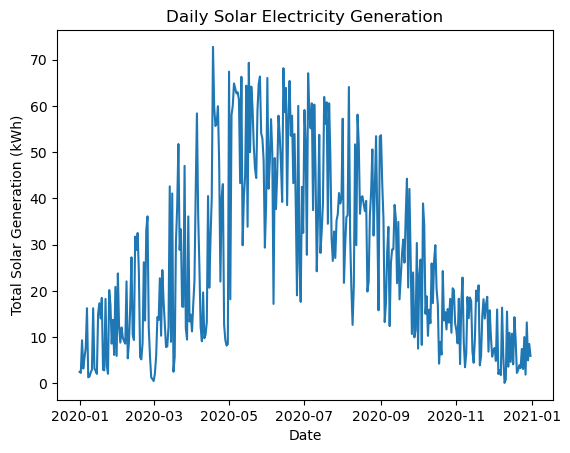

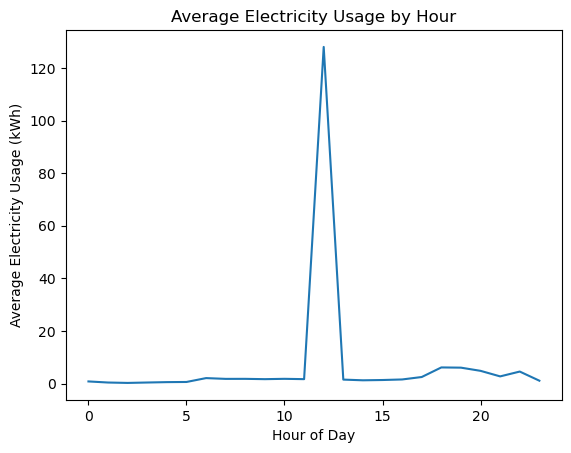

In [15]:
# Initial data analysis - Perform preliminary analysis to understand the data and identify patterns.
import matplotlib.pyplot as plt
import numpy as np

# Summary statistics
print(df.describe())

# Visualize solar electricity generation by day
df.groupby(df['Date/hour start'].dt.date)['Solar electricity generation (kWh)'].sum().plot()
plt.title('Daily Solar Electricity Generation')
plt.xlabel('Date')
plt.ylabel('Total Solar Generation (kWh)')
plt.show()

# Plot electricity usage throughout the day
df.groupby('Hour')['Electricity usage (kWh)'].mean().plot()
plt.title('Average Electricity Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Electricity Usage (kWh)')
plt.show()


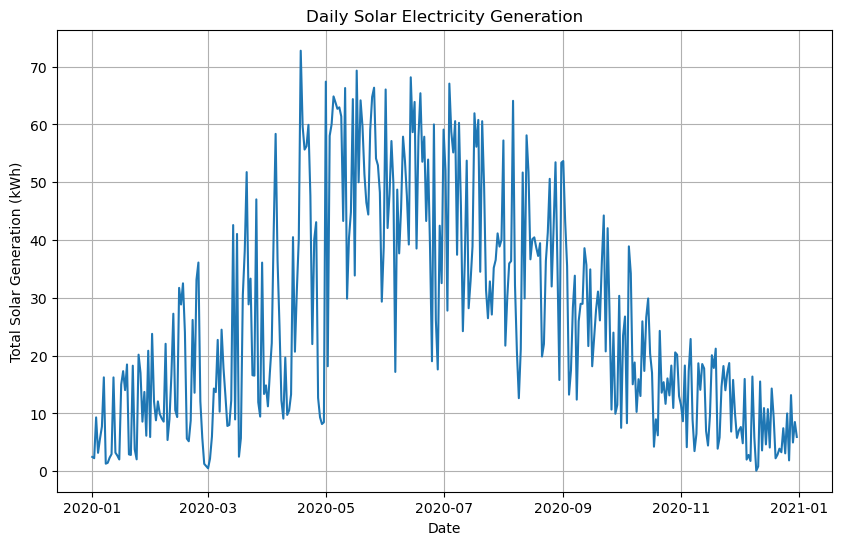

In [14]:
import matplotlib.pyplot as plt

# Convert 'Date/hour start' to datetime
df['Date/hour start'] = pd.to_datetime(df['Date/hour start'])

# Aggregate solar generation by day
daily_solar_generation = df.groupby(df['Date/hour start'].dt.date)['Solar electricity generation (kWh)'].sum().reset_index()

# Plotting daily solar generation
plt.figure(figsize=(10, 6))
plt.plot(daily_solar_generation['Date/hour start'], daily_solar_generation['Solar electricity generation (kWh)'])
plt.title('Daily Solar Electricity Generation')
plt.xlabel('Date')
plt.ylabel('Total Solar Generation (kWh)')
plt.grid(True)
plt.show()


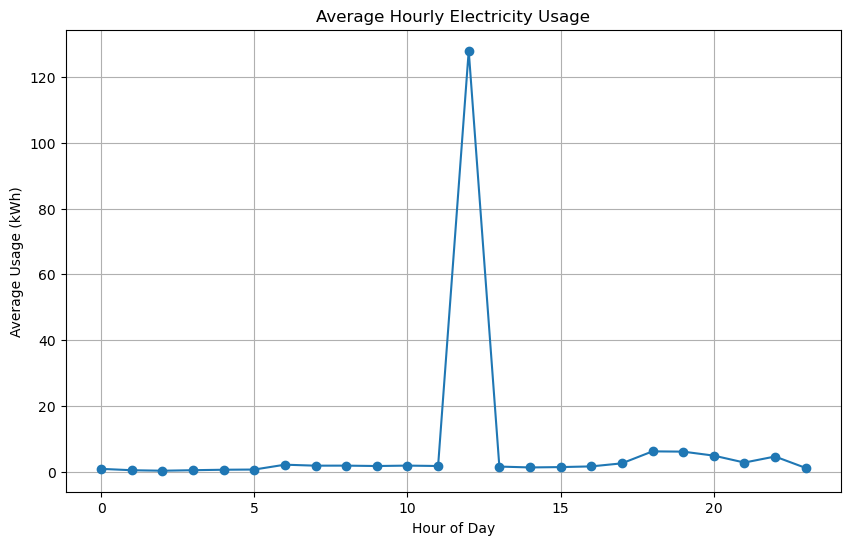

In [7]:
# Aggregate electricity usage by hour
hourly_usage = df.groupby('Hour')['Electricity usage (kWh)'].mean().reset_index()

# Plotting hourly electricity usage
plt.figure(figsize=(10, 6))
plt.plot(hourly_usage['Hour'], hourly_usage['Electricity usage (kWh)'], marker='o')
plt.title('Average Hourly Electricity Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Average Usage (kWh)')
plt.grid(True)
plt.show()


In [10]:
#Feature Engineering - Objective: Create new features that may help in analysis or predictive modeling.
# Example: Create a feature for excess solar electricity
# import os
# print(os.getcwd()) 
import pandas as pd
df = pd.read_csv('energy_analysis_data.csv')

df['Date/hour start'] = pd.to_datetime(df['Date/hour start
# Example: Create a feature for excess solar electricity
df['Excess solar generation (kWh)'] = df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)']

# Example: Add a month column
df['Month'] = df['Date/hour start'].dt.month
# Check the first few rows to ensure everything worked
print(df.head())


   Hour     Date/hour start  Solar electricity generation (kWh)  \
0     0 2020-01-01 00:00:00                                 0.0   
1     1 2020-01-01 01:00:00                                 0.0   
2     2 2020-01-01 02:00:00                                 0.0   
3     3 2020-01-01 03:00:00                                 0.0   
4     4 2020-01-01 04:00:00                                 0.0   

   Electricity usage (kWh)  Excess solar generation (kWh)  Month  
0                 1.509849                      -1.509849      1  
1                 1.411859                      -1.411859      1  
2                 1.023898                      -1.023898      1  
3                 0.642000                      -0.642000      1  
4                 0.960000                      -0.960000      1  


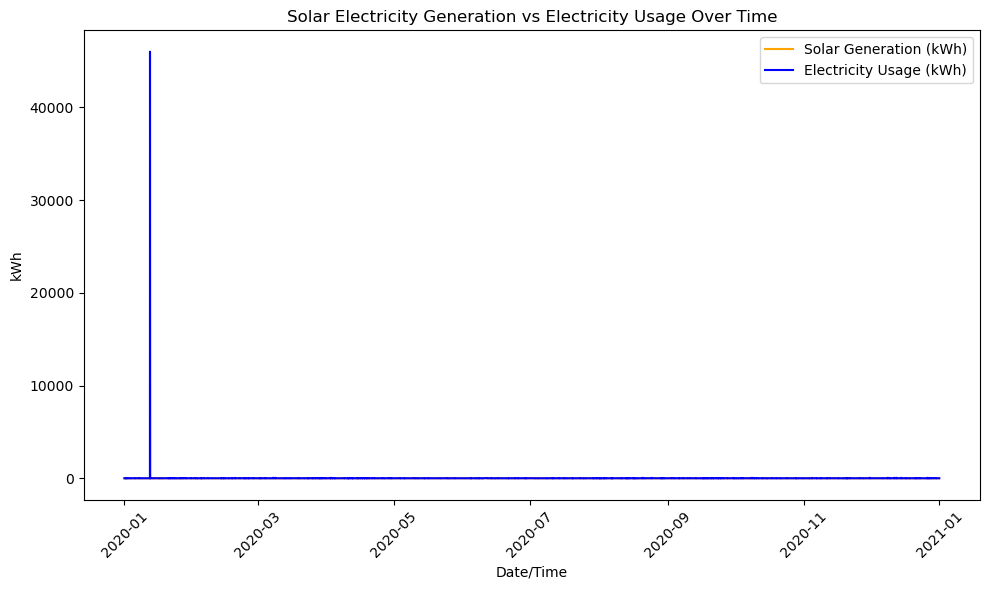

In [11]:
# matplotlib visualization to explore the "Excess solar generation" feature across time or hours of the day.
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(df['Date/hour start'], df['Solar electricity generation (kWh)'], label='Solar Generation (kWh)', color='orange')
plt.plot(df['Date/hour start'], df['Electricity usage (kWh)'], label='Electricity Usage (kWh)', color='blue')

# Add labels and title
plt.xlabel('Date/Time')
plt.ylabel('kWh')
plt.title('Solar Electricity Generation vs Electricity Usage Over Time')
plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


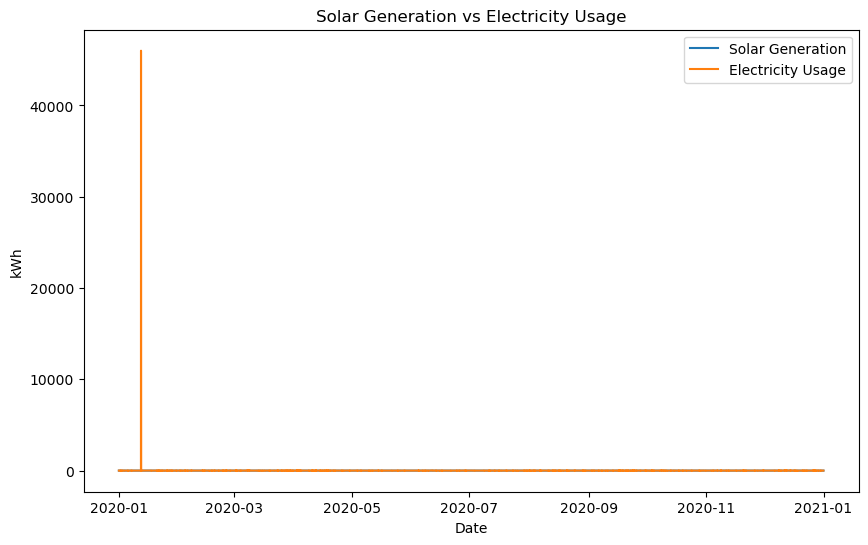

In [7]:
# Visualization and Reporting - Objective: Create visualizations to communicate findings.
import matplotlib.pyplot as plt
# Plotting example
plt.figure(figsize=(10, 6))
plt.plot(df['Date/hour start'], df['Solar electricity generation (kWh)'], label='Solar Generation')
plt.plot(df['Date/hour start'], df['Electricity usage (kWh)'], label='Electricity Usage')
plt.title('Solar Generation vs Electricity Usage')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.legend()
plt.show()


In [ ]:
#Exploratory Data Analysis (EDA) - Objective: Deep dive into data to identify trends, correlations, and insights.
# Correlation matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'energy_analysis_data.csv'
df = pd.read_csv(file_path)

# Display the correlation matrix
print(df.corr())

# Ensure matplotlib plots appear inline in Jupyter
%matplotlib inline

# Pair plot to visually examine relationships between variables
sns.pairplot(df[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']])
plt.suptitle('Pair Plot: Solar Generation vs Electricity Usage', y=1.02)
plt.show()

# Histogram for Solar Electricity Generation
df['Solar electricity generation (kWh)'].hist(bins=20, color='orange')
plt.title('Histogram of Solar Electricity Generation')
plt.xlabel('Solar Electricity Generation (kWh)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Histogram for Electricity Usage
df['Electricity usage (kWh)'].hist(bins=20, color='blue')
plt.title('Histogram of Electricity Usage')
plt.xlabel('Electricity Usage (kWh)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()
